In [110]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('R01_posneg_gest_stats_fdr05.csv')
df = df.fillna(0)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,chem_id_s1,M331,M332,M317,M524,M102,M341,M330,M345,M340,...,BH_sig_gestC,sig_gestcatC_neg,sig_gestcatC_pos,BH_sig_gestcatC,sig_gestcatV2C_neg,sig_gestcatV2C_pos,BH_sig_gestcatV2C,sig_gestMC_neg,sig_gestMC_pos,BH_sig_gestMC
0,158.0848_1.8326_75,23014.583414,35781.743242,630102.449070,11495.685179,297645.722596,114589.220618,1.526543e+06,101597.021085,236089.213100,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
1,148.0886_3.6386_30,10460.647408,22674.974161,22478.453200,10830.129767,46811.341571,27959.377011,1.155142e+04,5633.801102,26549.384877,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,196.0739_11.7317_477,11323.048129,11816.145003,11821.121662,12678.024245,6034.328408,18383.357132,1.089179e+04,10890.162708,10792.346778,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,147.1045_3.2268_364,57081.423799,54767.399215,49932.178513,38288.600153,3325.918526,72691.996597,4.950163e+04,79429.757331,7759.361744,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
4,147.1047_7.2359_363,5268.617733,3069.552750,11034.774489,4001.319531,3115.572284,3158.377996,1.068680e+03,1742.412358,3674.003545,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


In [112]:
df.shape

(685, 648)

In [113]:
df = df[(df['Sodium_Adduct'] == 0) & (df['Adduct_filter']== 0)]
df = df[(df['Potasium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Ammonium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['ACN_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Formate_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['H2O_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['CO2_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[df['pos_neg_dup'] == 0]

In [114]:
df = df.set_index('iso_id_esi')
df['species1'] = np.where(df['Met_Presence'] == 1, 'endogenous', 'exogenous')

In [115]:
df['species1']

iso_id_esi
C10H10N2_1.0_pos     exogenous
C10H12O_1.0_pos      exogenous
C10H12O4_1.0_pos    endogenous
C10H13N_1.0_pos      exogenous
C10H13N_2.0_pos      exogenous
                       ...    
C9H8N2O_1.0_neg      exogenous
C9H8O_1.0_neg        exogenous
C9H8O2_1.0_neg      endogenous
C9H8O3_1.0_neg      endogenous
C9HF17O2_1.0_neg     exogenous
Name: species1, Length: 685, dtype: object

In [116]:
dfH = df.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [117]:
lut1 = dict(zip(df['species1'].unique(), ["darkgray","red"]))
row_colors1 = df['species1'].map(lut1)

In [118]:
row_colors1

iso_id_esi
C10H10N2_1.0_pos    darkgray
C10H12O_1.0_pos     darkgray
C10H12O4_1.0_pos         red
C10H13N_1.0_pos     darkgray
C10H13N_2.0_pos     darkgray
                      ...   
C9H8N2O_1.0_neg     darkgray
C9H8O_1.0_neg       darkgray
C9H8O2_1.0_neg           red
C9H8O3_1.0_neg           red
C9HF17O2_1.0_neg    darkgray
Name: species1, Length: 685, dtype: object

In [119]:
col_names = dfH.columns.values
col_namesDF = pd.DataFrame(col_names, columns=['columns'])

In [120]:
col_namesDF['species'] = np.where(col_namesDF['columns'].str.contains('M'), 'orange', 'dodgerblue')
col_namesDF = col_namesDF.set_index('columns')
col_namesDF

,species
columns,
M331,orange
M332,orange
M317,orange
M524,orange
M102,orange
...,...
849C,dodgerblue
839C,dodgerblue
842C,dodgerblue


sns.set(font_scale=0.6)
g = sns.clustermap(dfH, cmap="Blues", vmin=0, vmax=10, row_colors=row_colors, col_colors=col_namesDF)

In [121]:
from scipy import stats
df_m = pd.read_csv('medicalrecabstraction.csv', sep=',')

In [122]:
col_namesDF = pd.read_csv('gestational_age_imputed_v2.csv')
col_namesDF = col_namesDF.drop('Unnamed: 0', axis=1)
col_namesDF

,ppt_id,log_ga_days,columns,species,ga_weeks_mr,ga_days_mr,ga_tdays_mr,ga_days_mr_total
0,331,2.439333,M331,orange,39.0,2.0,275.0,275.000000
1,331,2.439333,C331,dodgerblue,39.0,2.0,275.0,275.000000
2,332,2.434569,M332,orange,38.0,6.0,272.0,272.000000
3,317,2.451786,M317,orange,40.0,3.0,283.0,283.000000
4,317,2.451786,C317,dodgerblue,40.0,3.0,283.0,283.000000
...,...,...,...,...,...,...,...,...
583,842,2.432292,842C,dodgerblue,NaN,NaN,NaN,270.577638
584,846,2.446761,846M,orange,NaN,NaN,NaN,279.744451
585,846,2.446761,846C,dodgerblue,NaN,NaN,NaN,279.744451
586,845,2.420100,845M,orange,NaN,NaN,NaN,263.087186


In [123]:
col_namesDF.columns = col_namesDF.columns.str.replace('species', 'species1')

col_namesDF['species2_1'] = np.where(col_namesDF['ga_tdays_mr'] < 260, 'navy', '')
col_namesDF['species2_2'] = np.where(col_namesDF['ga_tdays_mr'] > 260, 'skyblue', '')

col_namesDF['species2'] = col_namesDF['species2_1']+col_namesDF['species2_2']
col_namesDF1 = col_namesDF.drop(['species2_1', 'species2_2'], axis=1)
col_namesDF2 = col_namesDF1.loc[col_namesDF['ga_tdays_mr'] == col_namesDF['ga_tdays_mr']]

In [124]:
col_namesDF2.to_csv('gestational_age_for_PCA.csv')
col_namesDF2

,ppt_id,log_ga_days,columns,species1,ga_weeks_mr,ga_days_mr,ga_tdays_mr,ga_days_mr_total,species2
0,331,2.439333,M331,orange,39.0,2.0,275.0,275.0,skyblue
1,331,2.439333,C331,dodgerblue,39.0,2.0,275.0,275.0,skyblue
2,332,2.434569,M332,orange,38.0,6.0,272.0,272.0,skyblue
3,317,2.451786,M317,orange,40.0,3.0,283.0,283.0,skyblue
4,317,2.451786,C317,dodgerblue,40.0,3.0,283.0,283.0,skyblue
...,...,...,...,...,...,...,...,...,...
471,776,2.440909,776M,orange,39.0,3.0,276.0,276.0,skyblue
476,755,2.457882,755C,dodgerblue,41.0,0.0,287.0,287.0,skyblue
477,755,2.457882,755M,orange,41.0,0.0,287.0,287.0,skyblue
508,761,2.440909,761C,dodgerblue,39.0,3.0,276.0,276.0,skyblue


In [125]:
col_namesDF['species3_1'] = np.where(col_namesDF['ga_tdays_mr'] < 260, 'black', '')
col_namesDF['species3_2'] = np.where(((col_namesDF['ga_tdays_mr'] >= 260) & (col_namesDF['ga_tdays_mr'] < 273)), 'gray', '')
col_namesDF['species3_3'] = np.where(((col_namesDF['ga_tdays_mr'] >= 273) & (col_namesDF['ga_tdays_mr'] < 287)), 'silver', '')
col_namesDF['species3_4'] = np.where(col_namesDF['ga_tdays_mr'] >= 287, 'whitesmoke', '')
col_namesDF['species3'] = col_namesDF['species3_1']+col_namesDF['species3_2']+col_namesDF['species3_3']+col_namesDF['species3_4']

col_namesDF1 = col_namesDF.drop(['species3_1', 'species3_2', 'species3_3', 'species3_4'], axis=1)
col_namesDF3 = col_namesDF1.loc[col_namesDF['ga_tdays_mr'] == col_namesDF['ga_tdays_mr']]

In [126]:
col_namesDF3

,ppt_id,log_ga_days,columns,species1,ga_weeks_mr,ga_days_mr,ga_tdays_mr,ga_days_mr_total,species2_1,species2_2,species2,species3
0,331,2.439333,M331,orange,39.0,2.0,275.0,275.0,,skyblue,skyblue,silver
1,331,2.439333,C331,dodgerblue,39.0,2.0,275.0,275.0,,skyblue,skyblue,silver
2,332,2.434569,M332,orange,38.0,6.0,272.0,272.0,,skyblue,skyblue,gray
3,317,2.451786,M317,orange,40.0,3.0,283.0,283.0,,skyblue,skyblue,silver
4,317,2.451786,C317,dodgerblue,40.0,3.0,283.0,283.0,,skyblue,skyblue,silver
...,...,...,...,...,...,...,...,...,...,...,...,...
471,776,2.440909,776M,orange,39.0,3.0,276.0,276.0,,skyblue,skyblue,silver
476,755,2.457882,755C,dodgerblue,41.0,0.0,287.0,287.0,,skyblue,skyblue,whitesmoke
477,755,2.457882,755M,orange,41.0,0.0,287.0,287.0,,skyblue,skyblue,whitesmoke
508,761,2.440909,761C,dodgerblue,39.0,3.0,276.0,276.0,,skyblue,skyblue,silver


In [127]:
col_namesDF1 = col_namesDF1.set_index('columns')
col_namesDF1 = col_namesDF1.loc[:, 'species1']

col_namesDF2 = col_namesDF2.set_index('columns')
col_namesDF2 = col_namesDF2.loc[:,['species1', 'species2']]

col_namesDF3 = col_namesDF3.set_index('columns')
col_namesDF3 = col_namesDF3.loc[:,['species1', 'species3']]

In [128]:
col_namesDF3

,species1,species3
columns,,
M331,orange,silver
C331,dodgerblue,silver
M332,orange,gray
M317,orange,silver
C317,dodgerblue,silver
...,...,...
776M,orange,silver
755C,dodgerblue,whitesmoke
755M,orange,whitesmoke


In [129]:
print((54+80)/588*100)

22.789115646258505


sns.set(font_scale=0.7)
g = sns.clustermap(dfH, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapMC.tiff', dpi=300)

sns.set(font_scale=0.7)
g = sns.clustermap(dfHM, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapM.tiff', dpi=300)

sns.set(font_scale=0.7)
g = sns.clustermap(dfHC, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapC.tiff', dpi=300)

df = pd.read_csv('R01_posneg_gest_stats.csv')
df = df.fillna(0)
df = df.drop('Unnamed: 0', axis=1)
df.head()

In [130]:
df

,chem_id_s1,M331,M332,M317,M524,M102,M341,M330,M345,M340,...,sig_gestcatC_neg,sig_gestcatC_pos,BH_sig_gestcatC,sig_gestcatV2C_neg,sig_gestcatV2C_pos,BH_sig_gestcatV2C,sig_gestMC_neg,sig_gestMC_pos,BH_sig_gestMC,species1
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H10N2_1.0_pos,158.0848_1.8326_75,23014.583414,35781.743242,630102.449070,11495.685179,297645.722596,114589.220618,1.526543e+06,101597.021085,236089.213100,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H12O_1.0_pos,148.0886_3.6386_30,10460.647408,22674.974161,22478.453200,10830.129767,46811.341571,27959.377011,1.155142e+04,5633.801102,26549.384877,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H12O4_1.0_pos,196.0739_11.7317_477,11323.048129,11816.145003,11821.121662,12678.024245,6034.328408,18383.357132,1.089179e+04,10890.162708,10792.346778,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,endogenous
C10H13N_1.0_pos,147.1045_3.2268_364,57081.423799,54767.399215,49932.178513,38288.600153,3325.918526,72691.996597,4.950163e+04,79429.757331,7759.361744,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C10H13N_2.0_pos,147.1047_7.2359_363,5268.617733,3069.552750,11034.774489,4001.319531,3115.572284,3158.377996,1.068680e+03,1742.412358,3674.003545,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9H8N2O_1.0_neg,160.0639_5.7146_33,7539.435471,104818.089726,4011.933121,13480.667976,113395.643158,60719.560627,5.238938e+03,45589.479347,117230.137490,...,1.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C9H8O_1.0_neg,132.0576_5.3568_283,635.582616,1768.427586,1406.367253,7809.952567,13035.288043,1433.358954,1.827622e+03,1669.775180,4544.108838,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,exogenous
C9H8O2_1.0_neg,148.0526_2.1169_256,358159.014834,157068.385277,701612.501761,372464.792116,244608.739591,384360.588364,2.211682e+05,376849.914047,447320.709265,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,endogenous


In [131]:
dfs = df.loc[(df['sig_mvc_neg'] == 1)|(df['sig_mvc_pos'] == 1)]

In [132]:
df.shape, dfs.shape

((685, 648), (450, 648))

In [133]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


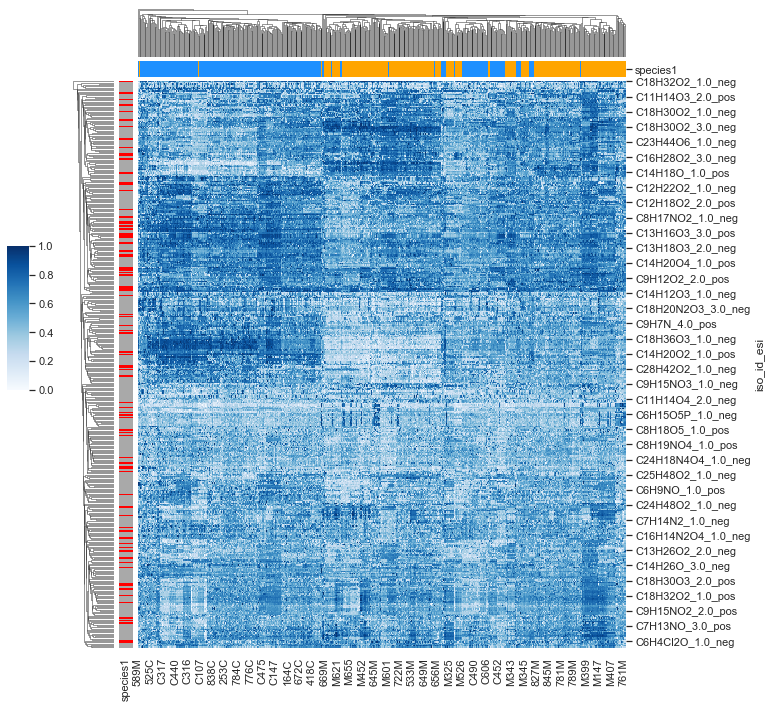

In [134]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF1, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_MCdiff_NI.png', dpi=300)

In [135]:
dfs = df.loc[(df['BH_sig_mvc'] == 1)]

In [136]:
df.shape, dfs.shape

((685, 648), (432, 648))

In [137]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

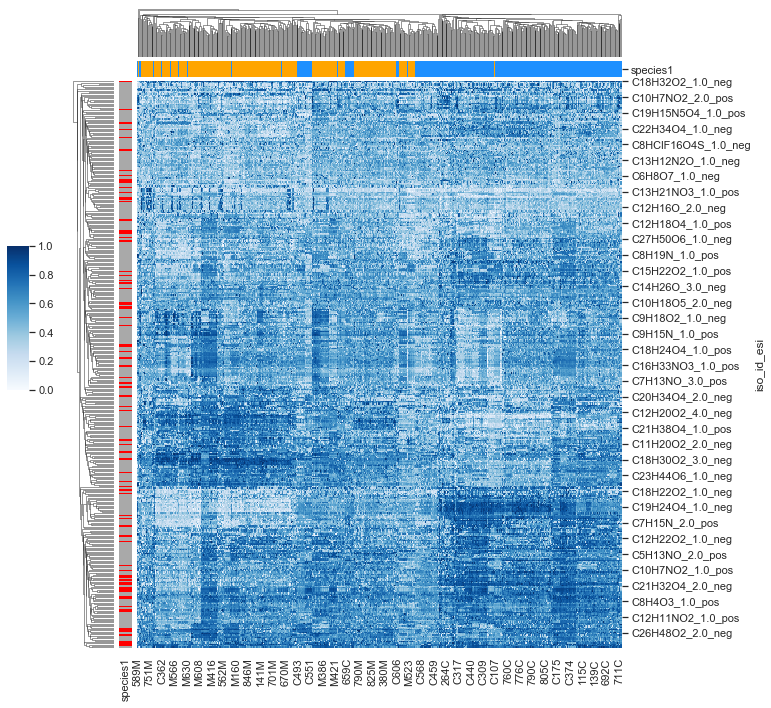

In [138]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF1, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_MCdiff_BH_NI.png', dpi=300)

In [139]:
dfs = df.loc[(df['sig_gestcatV2M_pos'] == 1)|(df['sig_gestcatV2M_neg'] == 1)]

In [140]:
df.shape, dfs.shape

((685, 648), (43, 648))

In [141]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

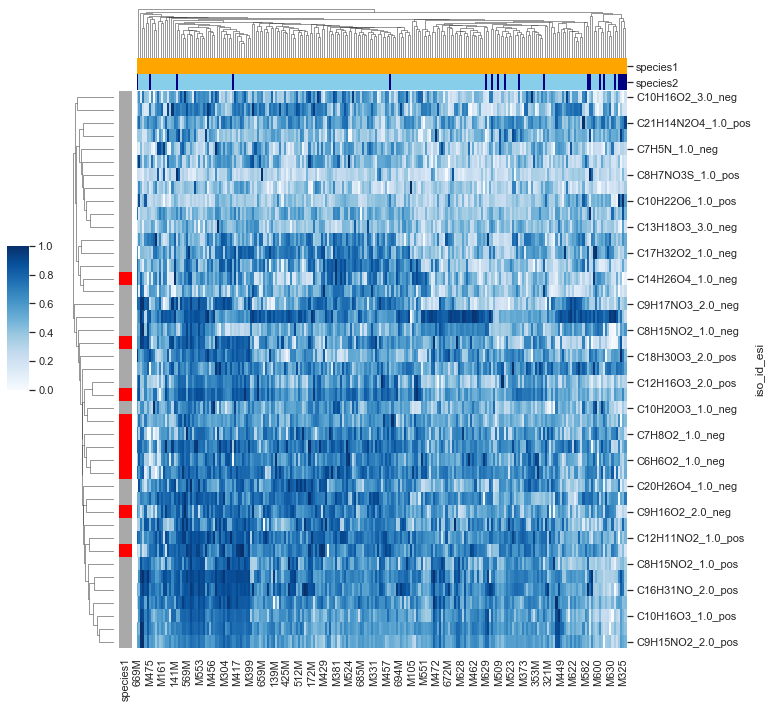

In [142]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF2, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTB2cat_NI.png', dpi=300)

In [143]:
dfs = df.loc[(df['sig_gestcatV2C_pos'] == 1)|(df['sig_gestcatV2C_neg'] == 1)]

In [144]:
dfs.shape

(44, 648)

In [145]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

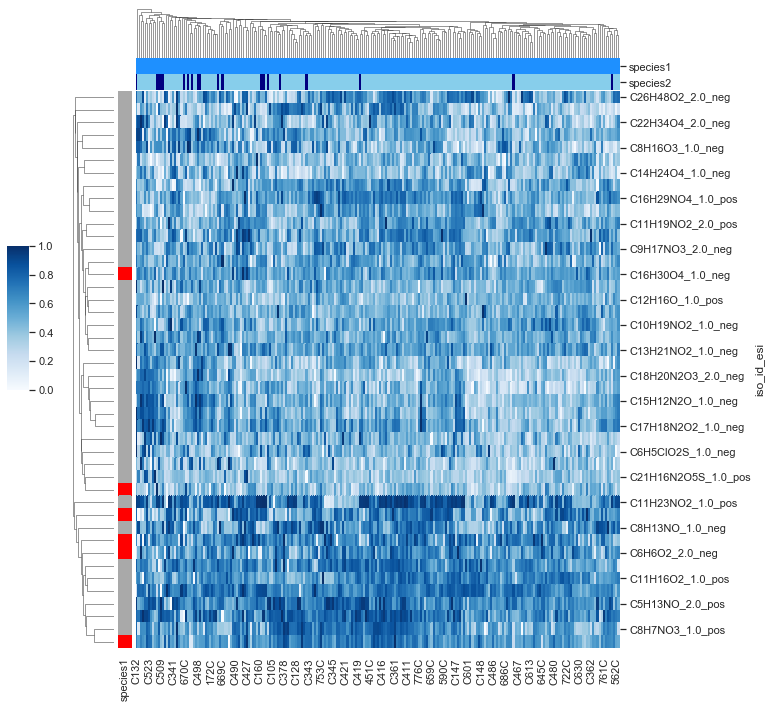

In [146]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF2, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapC_standard_scale_simple_PTB2cat_NI.png', dpi=300)

sns.set(font_scale=0.8)
g = sns.clustermap(dfH, cmap='YlGnBu_r', row_colors=row_colors, col_colors=col_namesDF, 
                   colors_ratio=(0.015, 0.02), z_score=0, 
                   dendrogram_ratio=0.1, cbar_pos=(-0.06, .3, .03, .4))
g.savefig('clustermapMC_BH_z_score.tiff', dpi=300)

In [147]:
dfs = df.loc[(df['BH_sig_gestcatV2M'] == 1)]

In [148]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [149]:
dfHM

,M331,M332,M317,M524,M102,M341,M330,M345,M340,M507,...,753M,398M,372M,380M,751M,762M,764M,776M,755M,761M
iso_id_esi,,,,,,,,,,,,,,,,,,,,,
C10H16O2_3.0_neg,4.607904,3.830418,4.400279,4.740565,4.026148,3.917185,4.617941,4.134733,3.932744,3.837159,...,4.095521,4.362718,3.855871,4.393797,4.254897,4.722014,4.262128,5.791287,4.457121,5.116055


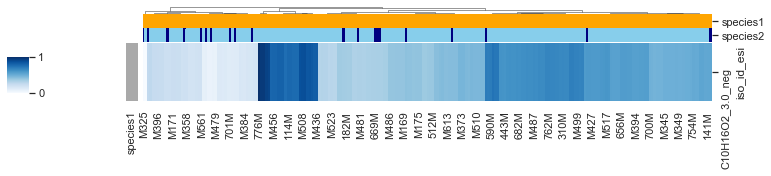

In [150]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF2, row_cluster = False,
                   colors_ratio=(0.02, 0.15), standard_scale=0, figsize=(10, 2.5),
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTB2cat_NI_BH.png', dpi=300)

In [151]:
dfs = df.loc[(df['BH_sig_gestcatV2C'] == 1)]

In [152]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [153]:
dfHC.shape

(0, 236)

In [154]:
dfs = df.loc[(df['BH_sig_gestcatV2C'] == 1)]

In [155]:
dfs.shape

(0, 648)

In [156]:
dfs = df.loc[(df['sig_gestM_pos'] == 1)|(df['sig_gestM_neg'] == 1)]

In [157]:
dfs.shape

(54, 648)

In [158]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


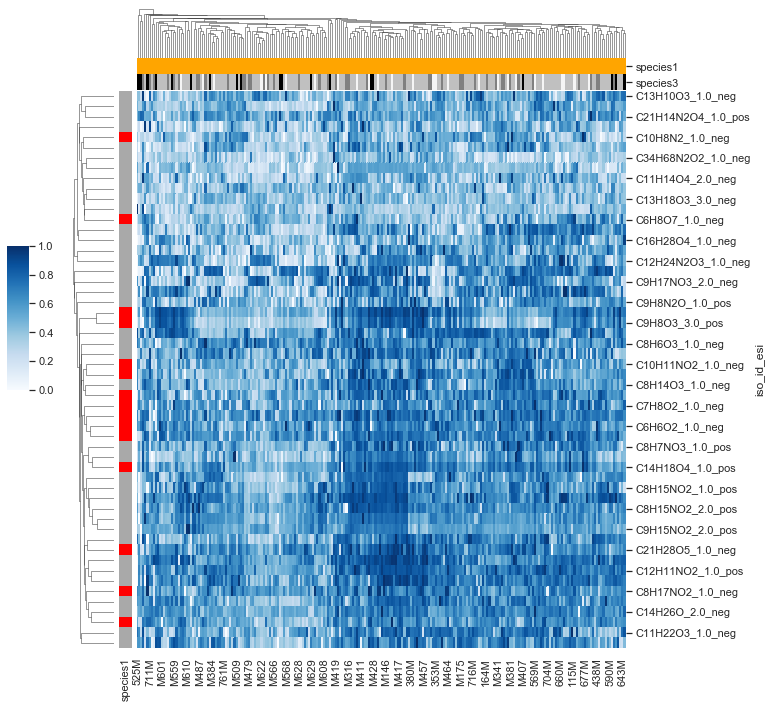

In [159]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF3, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTBnumerical_NI.png', dpi=300)

In [160]:
dfs = df.loc[(df['sig_gestC_pos'] == 1)|(df['sig_gestC_neg'] == 1)]

In [161]:
dfs.shape

(45, 648)

In [162]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfH = dfH.loc[:, dfH.columns.isin(col_namesDF2.index)]
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

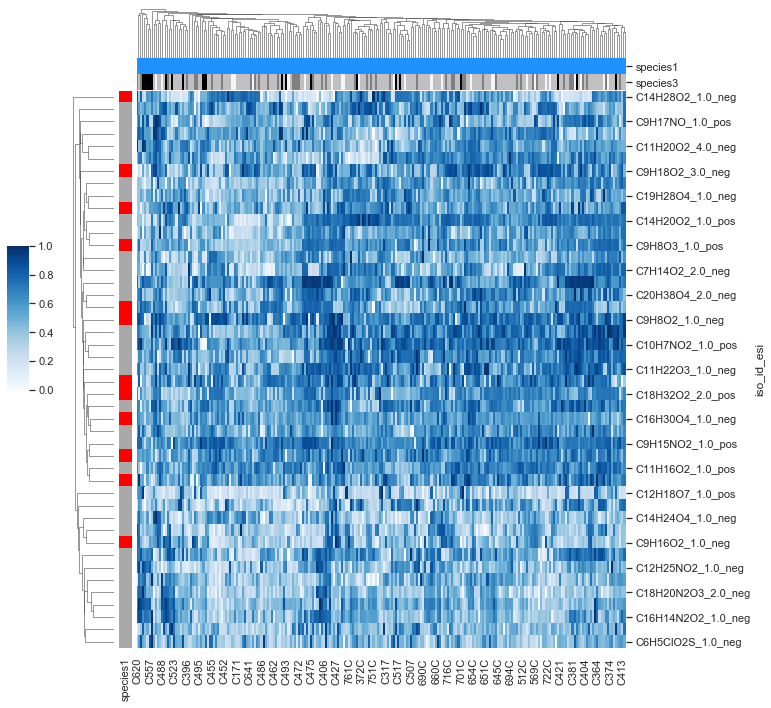

In [163]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF3, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapC_standard_scale_simple_PTBnumerical_NI.png', dpi=300)

In [164]:
dfs = df.loc[(df['BH_sig_gestM'] == 1)]

In [165]:
dfs.shape

(0, 648)

In [166]:
dfs = df.loc[(df['BH_sig_gestC'] == 1)]

In [167]:
dfs.shape

(0, 648)